In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import os
import glob
from scipy.stats import pearsonr, linregress

Number of data points in each pLDDT bin:
pLDDT Group
<70        16
70-80     103
80-90     242
90-100    189
Name: count, dtype: int64
                 mean       std
pLDDT Group                    
<70          1.670480  0.450001
70-80        1.271799  0.639722
80-90        1.002660  0.630151
90-100       0.581505  0.511484
Pearson Correlation Coefficient: -0.433
P-value: 1.646e-26


/var/folders/6v/7hycfbhs6fg9jp_q0z6h9flm0000gp/T/ipykernel_19607/1515968569.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby("pLDDT Group")["Ligand RMSD"].agg(["mean", "std"])


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(0, -0.5, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5')])

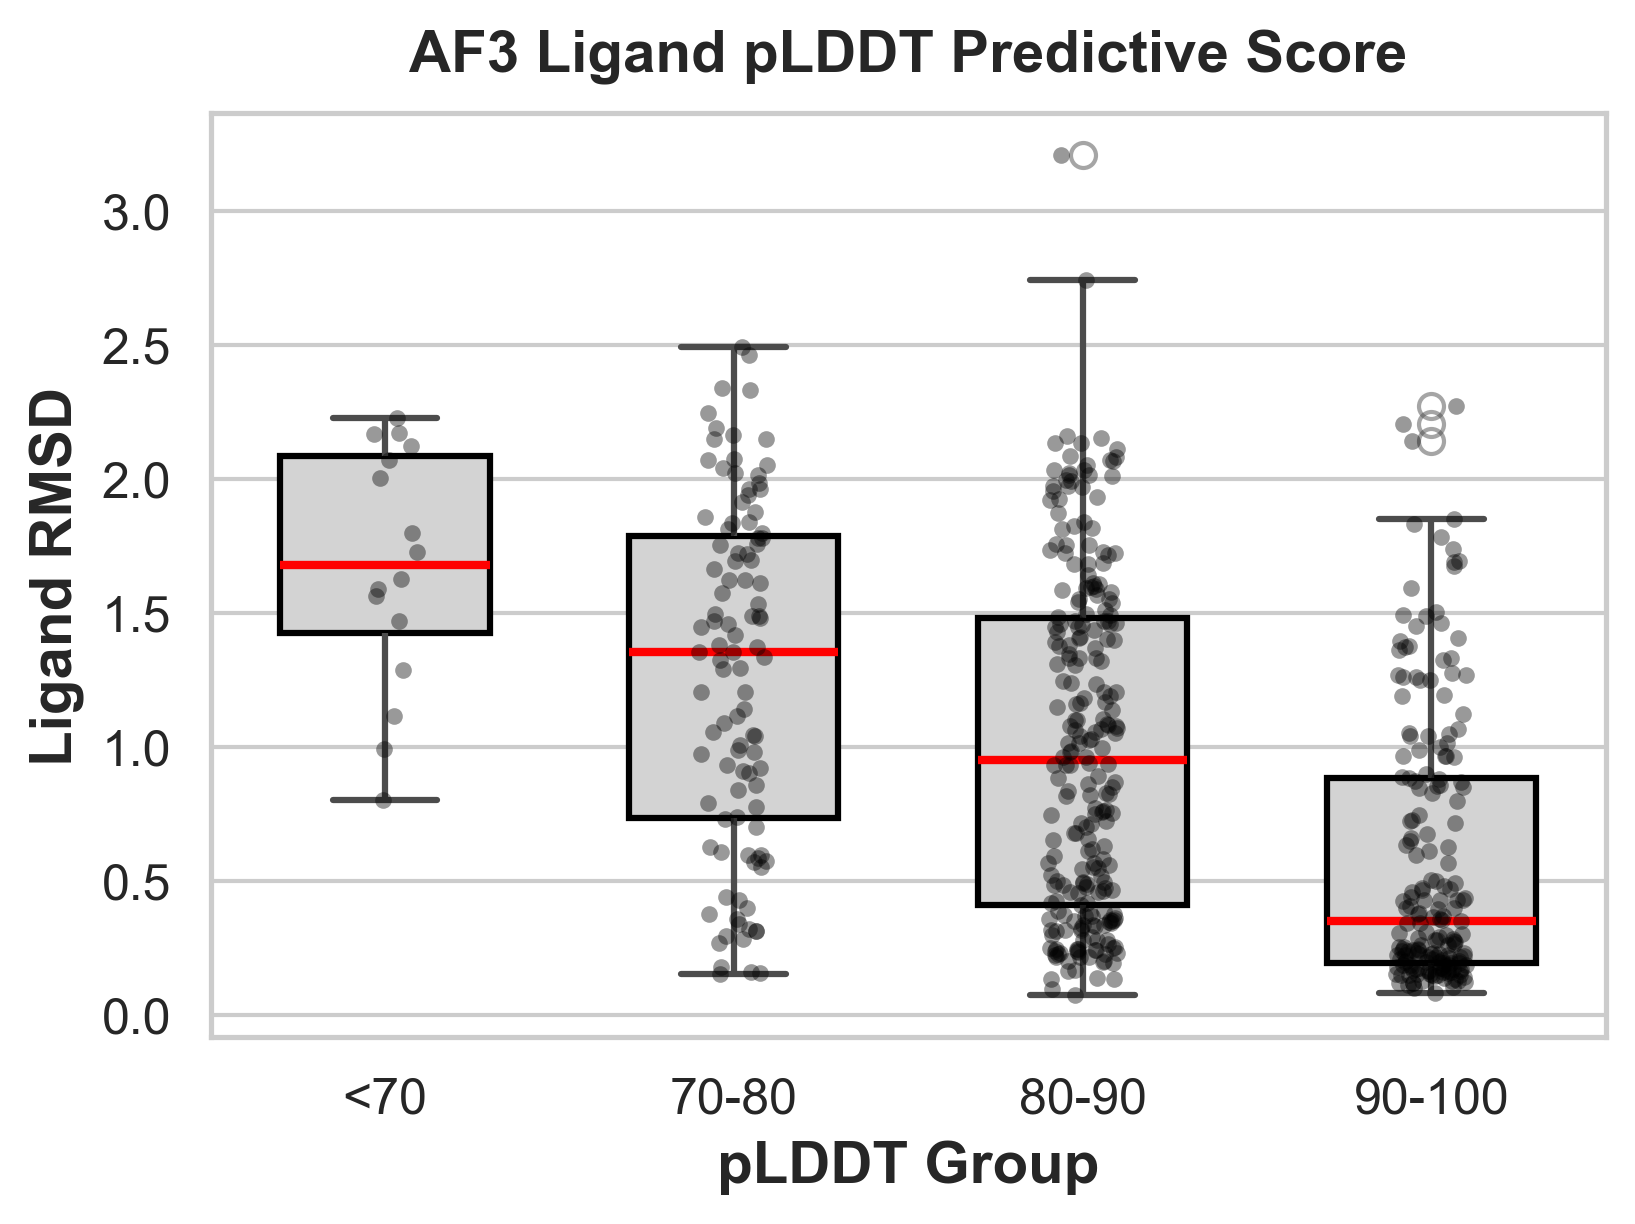

In [2]:
#Load file (Change the file_path to your own xlsx/csv file)
file_path = "/Users/JB/Rotation_bkslab/250203_alphafold3/20241209_mac1.xlsx"
data = pd.read_excel(file_path)

#Define bins and labels (set up appropriate bins for your box plot)
bins = [0, 70, 80, 90, 100]
labels = ["<70", "70-80", "80-90", "90-100"]

# Extract data (14th column is Ligand pLDDT, 13th column is Ligand RMSD)
x = data.iloc[:, 13]  
y = data.iloc[:, 12]

# Create DataFrame
df = pd.DataFrame({"L-pLDDT": x, "Ligand RMSD": y})
df.dropna(inplace=True)

# Assign each pLDDT value to a bin
df["pLDDT Group"] = pd.cut(df["L-pLDDT"], bins=bins, labels=labels, include_lowest=True)

# Count number of data points in each bin
bin_counts = df["pLDDT Group"].value_counts().sort_index()
stats = df.groupby("pLDDT Group")["Ligand RMSD"].agg(["mean", "std"])

# Print results
print("Number of data points in each pLDDT bin:")
print(bin_counts)
print(stats)

# Pearson's
corr_coeff, p_value = pearsonr(df["L-pLDDT"], df["Ligand RMSD"])

# Print correlation results
print(f"Pearson Correlation Coefficient: {corr_coeff:.3f}")
print(f"P-value: {p_value:.3e}")

# Adding aesthetics to the plot
sns.set(style="whitegrid", context="notebook")
plt.figure(figsize=(6, 4), dpi=300)  # High-resolution figure for publication

# Box plots
sns.boxplot(x="pLDDT Group", y="Ligand RMSD", data=df,  
            width=0.6, linewidth=1.5,  
            boxprops={'facecolor': 'lightgray', 'edgecolor': 'black'}, 
            whiskerprops={'linewidth': 1.5}, capprops={'linewidth': 1.5}, 
            medianprops={'color': 'red', 'linewidth': 2}, flierprops={'marker': 'o', 'alpha': 0.5})

# Individual points are overlayed on plots
sns.stripplot(x="pLDDT Group", y="Ligand RMSD", data=df,  
              jitter=True, size=4, color="black", alpha=0.4)

# Axes, labels, etc.
plt.xlabel("pLDDT Group", fontsize=14, fontweight='bold', fontname='Arial')
plt.ylabel("Ligand RMSD", fontsize=14, fontweight='bold', fontname='Arial')
plt.title("AF3 Ligand pLDDT Predictive Score", fontsize=14, fontweight='bold', fontname='Arial', pad=10)
plt.xticks(fontsize=12, fontname='Arial')
plt.yticks(fontsize=12, fontname='Arial')